In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
%matplotlib inline

In [2]:
df = pd.read_csv('epi_r.csv')

In [3]:
df.rating.head()

0    2.500
1    4.375
2    3.750
3    5.000
4    3.125
Name: rating, dtype: float64

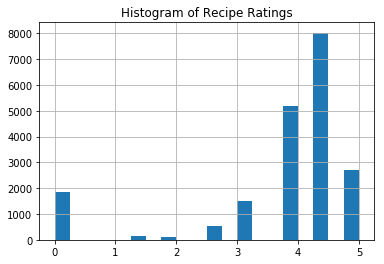

In [4]:
df.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [5]:
# Transform our outcome variable to binary classifier where ratings 3 and above are coded 1 and 0,1,&2 are 0
df['rating'] = np.where(df.rating >= 3, 0, 1)

In [6]:
df.rating.head()

0    1
1    0
2    0
3    0
4    0
Name: rating, dtype: int64

In [7]:
df.columns.unique().value_counts().sum()

680

rating            1.000000
drink             0.251456
alcoholic         0.231534
house & garden    0.206776
gin               0.185443
cocktail          0.146378
spirit            0.144368
cocktail party    0.140329
bitters           0.131997
harpercollins     0.106326
liqueur           0.095547
non-alcoholic     0.086717
rum               0.082160
condiment         0.073070
brandy            0.066678
créme de cacao    0.064671
weelicious        0.063983
fortified wine    0.062089
pernod            0.059181
fruit juice       0.058584
chartreuse        0.057062
chile pepper      0.056640
lime juice        0.055068
pickles           0.051480
tea               0.050650
party             0.049843
punch             0.049662
sauce             0.049159
dip               0.048241
leftovers         0.047825
champagne         0.046581
Name: rating, dtype: float64


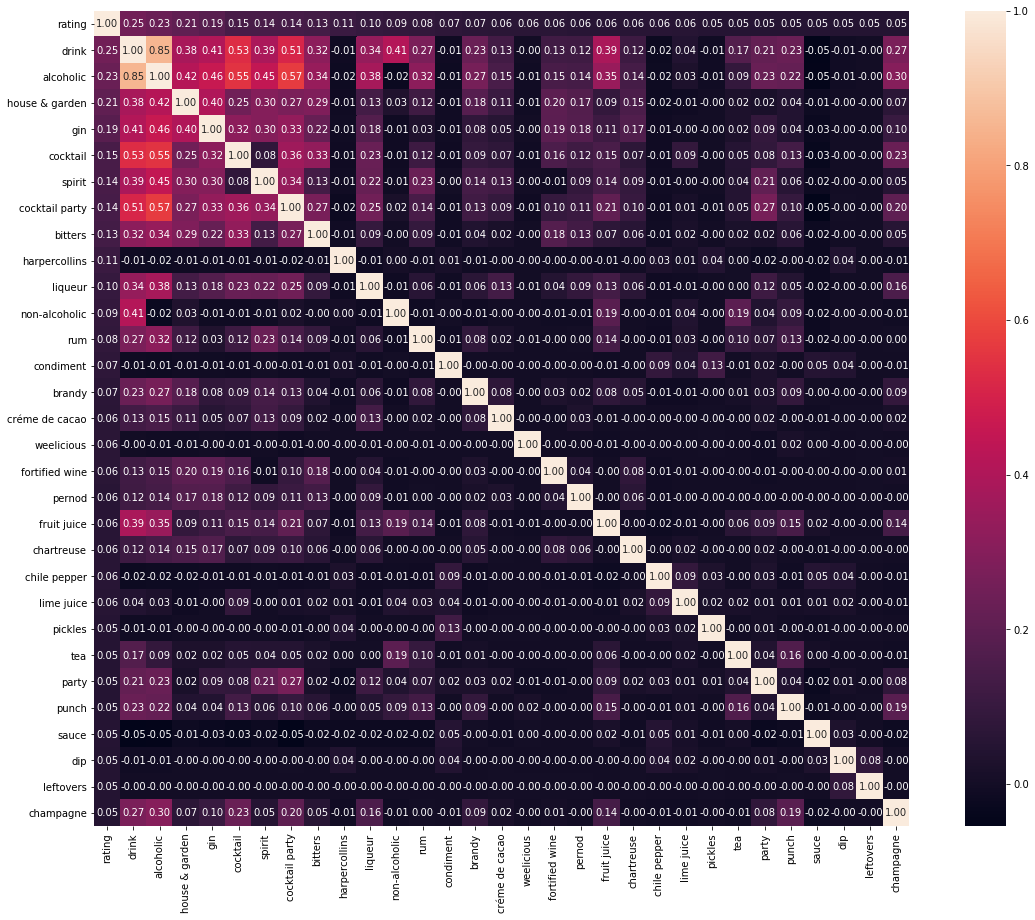

In [8]:
target = 'rating'
nr_cols = 31
corrmat = df.corr()
print (corrmat.nlargest(nr_cols, target)[target])

cols = corrmat.nlargest(nr_cols, target)[target].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(20,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
# Since 'alcoholic', 'cocktail', and 'cocktail party' are basically redundant with 'drink' feature we will drop them
df = df.drop(['alcoholic', 'cocktail', 'cocktail party'], 1)

rating            1.000000
drink             0.251456
house & garden    0.206776
gin               0.185443
spirit            0.144368
bitters           0.131997
harpercollins     0.106326
liqueur           0.095547
non-alcoholic     0.086717
rum               0.082160
condiment         0.073070
brandy            0.066678
créme de cacao    0.064671
weelicious        0.063983
fortified wine    0.062089
pernod            0.059181
fruit juice       0.058584
chartreuse        0.057062
chile pepper      0.056640
lime juice        0.055068
pickles           0.051480
tea               0.050650
party             0.049843
punch             0.049662
sauce             0.049159
dip               0.048241
leftovers         0.047825
champagne         0.046581
whiskey           0.045456
rye               0.045345
scotch            0.044821
Name: rating, dtype: float64


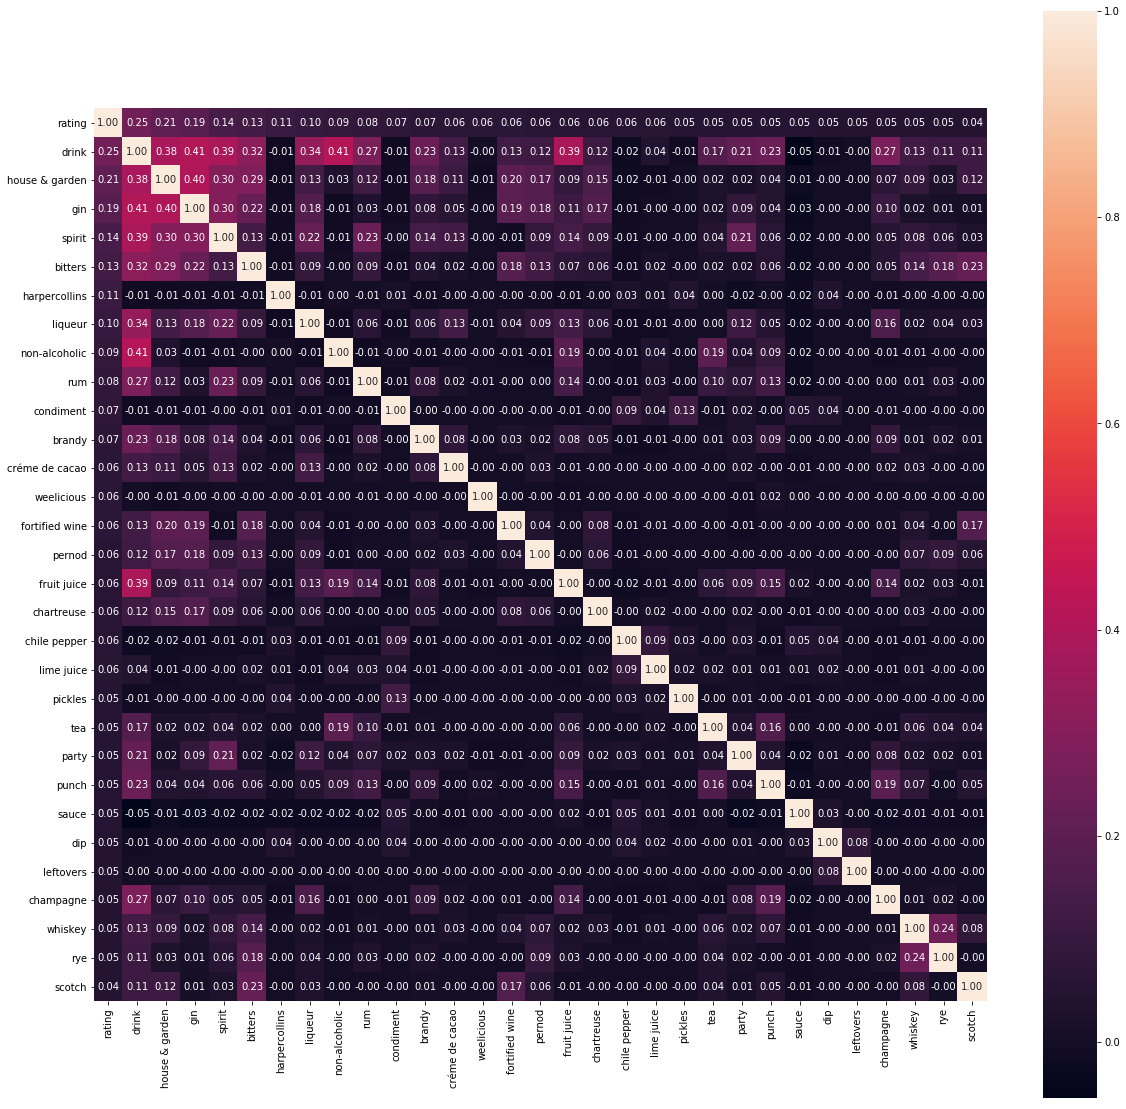

In [10]:
target = 'rating'
nr_cols = 31
corrmat = df.corr()
print (corrmat.nlargest(nr_cols, target)[target])

cols = corrmat.nlargest(nr_cols, target)[target].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,0.132456,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,0.338994,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
feats = df[['rating', 'drink', 'house & garden', 'gin', 'spirit', 'bitters', 'harpercollins', 'liqueur', 'non-alcoholic', 'rum', 'condiment', 'brandy', 'créme de cacao', 'weelicious', 'fortified wine', 'pernod', 'fruit juice', 'chartreuse', 'chile pepper', 'lime juice', 'pickles', 'tea', 'party', 'sauce', 'dip', 'leftovers', 'champagne', 'whiskey', 'rye', 'scotch']]

In [29]:
from sklearn.svm import SVC
svc = SVC()
X = feats.drop('rating', 1)
Y = feats.rating
svc.fit(X,Y)

print(svc.score(X, Y))

from sklearn.model_selection import cross_val_score
print(cross_val_score(svc, X, Y, cv=5))

0.87557350887692
[0.87437687 0.87605985 0.87456359 0.8755611  0.87331671]


We see much better performance from our simplified feature space as well as consistent cross validation scores showing no overfit issues. 